# Final Project - Machine Learning 2024/25

### Supervised Learning algorithms - Predicting heart disease

For every algorithm we optimise one hyperparameter which is important to the specific algortihm.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# read preprocessed data
data = pd.read_csv("data/preprocessedData.csv")
data = data.sample(2000)
len(data)


2000

In [ ]:
# split data into train and test subsets
train, test = train_test_split(data, test_size = 0.3, train_size=0.7, random_state= 13)

# separate the predictors and the criterion variable
trainDataWithoutCrit = train.drop('Heart_Disease', axis=1)  
trainCrit = train['Heart_Disease']       

testDataWithoutCrit = test.drop('Heart_Disease', axis=1)  
testCrit = test['Heart_Disease']  

# Decision Tree

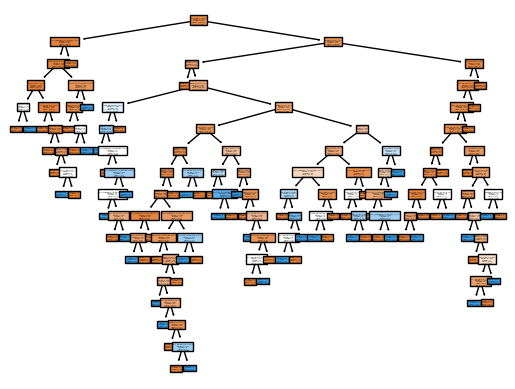

train data accuracy: 1.0
test data accuracy: 0.87


In [4]:
# decision tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(trainDataWithoutCrit, trainCrit)
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
#plt.savefig('first-huge-tree.svg', format='svg')
plt.show()

# get accuracy score
print(f"train data accuracy: {model.score(trainDataWithoutCrit, trainCrit).round(2)}")
print(f"test data accuracy: {model.score(testDataWithoutCrit, testCrit).round(2)}")


### What do we observe?

We know that one of the biggest problems with deision trees is overfitting.
As we can see here, the classifier has a perfect training performance but the test performance can be improved. 

We will now use pre-prunning (define the max-depth that the tree should have) to get a worse training but hopefully a better test performance:

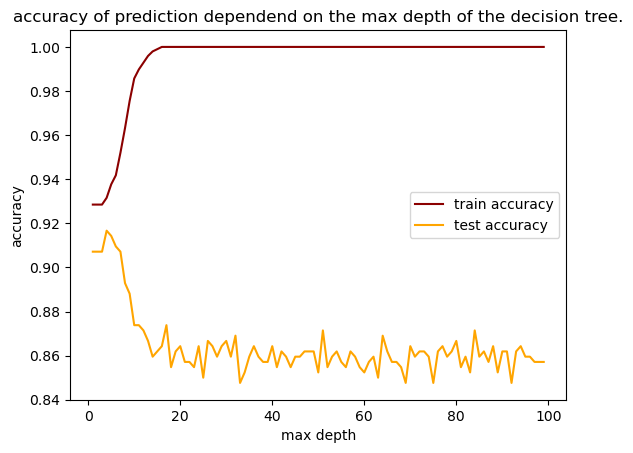

In [5]:
# decision tree with different max depths:
allTrainAccuracies = []
allTestAccuracies = []
maxDepth = 100
for i in range(1, maxDepth):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = model.fit(trainDataWithoutCrit, trainCrit)
    allTrainAccuracies.append(model.score(trainDataWithoutCrit, trainCrit))
    allTestAccuracies.append(model.score(testDataWithoutCrit, testCrit))

plt.plot(range(1, maxDepth), allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(range(1, maxDepth), allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the max depth of the decision tree.")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('tree-accuracy-max-depth.svg', format='svg')
plt.show()

bestPerformingDepth = allTestAccuracies.index(max(allTestAccuracies)) + 1

[Text(0.5, 0.9, 'Age_Category <= 54.5\nentropy = 0.372\nsamples = 979\nvalue = [909, 70]\nclass = Healthy'),
 Text(0.29411764705882354, 0.7, 'Green_Vegetables_Consumption <= 9.0\nentropy = 0.075\nsamples = 440\nvalue = [436, 4]\nclass = Healthy'),
 Text(0.23529411764705882, 0.5, 'Alcohol_Consumption <= 18.0\nentropy = 0.14\nsamples = 203\nvalue = [199, 4]\nclass = Healthy'),
 Text(0.11764705882352941, 0.3, 'General_Health <= 1.5\nentropy = 0.085\nsamples = 188\nvalue = [186, 2]\nclass = Healthy'),
 Text(0.058823529411764705, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Healthy'),
 Text(0.17647058823529413, 0.1, 'entropy = 0.048\nsamples = 186\nvalue = [185, 1]\nclass = Healthy'),
 Text(0.35294117647058826, 0.3, 'FriedPotato_Consumption <= 14.0\nentropy = 0.567\nsamples = 15\nvalue = [13, 2]\nclass = Healthy'),
 Text(0.29411764705882354, 0.1, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1]\nclass = Healthy'),
 Text(0.4117647058823529, 0.1, 'entropy = 0.0\nsamples = 1\nvalue

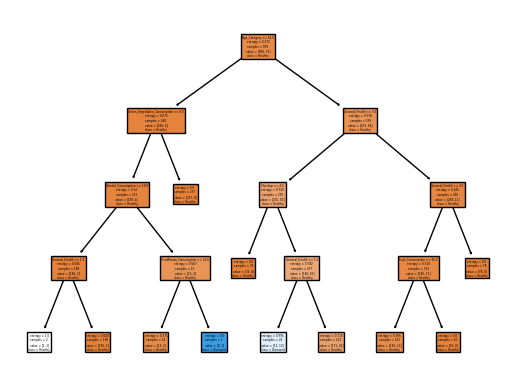

In [6]:
# show best performing plot
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=bestPerformingDepth)
model = model.fit(trainDataWithoutCrit, trainCrit)
model
tree.plot_tree(model,
               feature_names = list(trainDataWithoutCrit.columns), 
               class_names = ["Healthy", "Diseased"], 
               filled = True)
#plt.savefig('bestTree.svg', format='svg')
#plt.show()




In [ ]:
y_true = testCrit
y_pred_test = model.predict(testDataWithoutCrit)
bestAccuracyTrees = model.score(testDataWithoutCrit, testCrit)
print(bestAccuracyTrees)
print(precision_score(y_true, y_pred_test, average='micro'))
print(precision_score(y_true, y_pred_test, average='macro'))
print(precision_score(y_true, y_pred_test, average='weighted'))

precisionTrees = precision_score(y_true, y_pred_test, average='binary')
print(precisionTrees)
recallTrees = recall_score(testCrit, y_pred_test, average='binary')
print(recall_score(y_true, y_pred_test, average='micro'))
print(recall_score(y_true, y_pred_test, average='macro'))
print(recall_score(y_true, y_pred_test, average='weighted'))
F1Trees = f1_score(testCrit, y_pred_test, average='binary')

print(recallTrees)

cm = confusion_matrix(y_true, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### What does this mean?

Here we saw, that apparently one variable (namely "General_Health") is generally so predective that only its' classification is needed to get the overall best accuracy for a subset of 1000 cases, 5 decisions seem to have the best performance for the complete dataset.
Let's see how this behaves in other supervised algorithms.

# Multi-layer perceptron

In [8]:
# scale all features, otherwise overrepresentation for big features
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
X_train = scaler.transform(trainDataWithoutCrit)  
X_test = scaler.transform(testDataWithoutCrit)

In [9]:
# build perceptron

clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=1e-5,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


train data accuracy: 0.9
test data accuracy: 0.9


### optimise Learning rate and network architecture

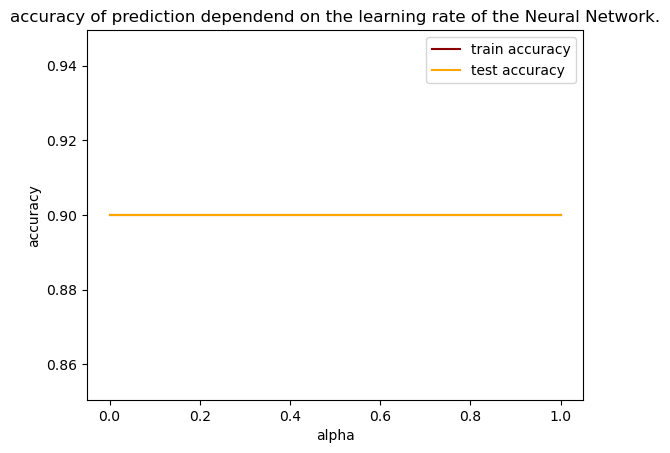

In [10]:
allTrainAccuracies = []
allTestAccuracies = []
alphas = np.linspace(1e-10, 1, 100)
for alpha in alphas:
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alpha,
                    hidden_layer_sizes=(10, 10), 
                    random_state=12,
                    max_iter=1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(alphas, allTrainAccuracies, c = "darkred", label = "train accuracy")
#plt.scatter(range(1, maxDepth), allTrainAccuracies, c = "darkred", marker='x')

plt.plot(alphas, allTestAccuracies, c = "orange", label = "test accuracy")
#plt.scatter(range(1, maxDepth), allTestAccuracies, c = "orange", marker='x')

plt.title("accuracy of prediction dependend on the learning rate of the Neural Network.")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-learning-rate.svg', format='svg')
plt.show()


bestPerformingAlpha = allTestAccuracies.index(max(allTestAccuracies)) 

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


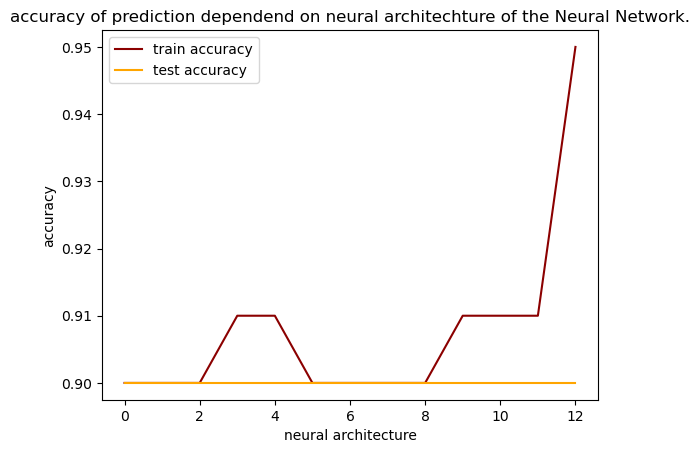

1

In [11]:
allTrainAccuracies = []
allTestAccuracies = []
hiddenLayerConfigs = [(1), (2), (5), (10), (50), (1, 1), (2, 2), (5, 5), (10, 10), (50, 50), (50, 25), (10, 10, 10), (100, 50, 25)]

for i in range(len(hiddenLayerConfigs)):
    layerConfig = hiddenLayerConfigs[i]
    clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= layerConfig, 
                    random_state= 12,
                    max_iter= 1000)
    clf.fit(X_train, trainCrit)

    # get accuracy score
    allTrainAccuracies.append(clf.score(X_train, trainCrit).round(2))
    allTestAccuracies.append(clf.score(X_test, testCrit).round(2))
    #alphas.append(alpha)

plt.plot(range(len(hiddenLayerConfigs)), allTrainAccuracies, c = "darkred", label = "train accuracy")

plt.plot(range(len(hiddenLayerConfigs)), allTestAccuracies, c = "orange", label = "test accuracy")

plt.title("accuracy of prediction dependend on neural architechture of the Neural Network.")
plt.xlabel("neural architecture")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('mlp-accuracy-architecture.svg', format='svg')
plt.show()


bestPerformingLayerConfig = allTestAccuracies.index(max(allTestAccuracies)) 
hiddenLayerConfigs[bestPerformingLayerConfig]

train data accuracy: 0.9
test data accuracy: 0.9


/Users/ellaalle/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


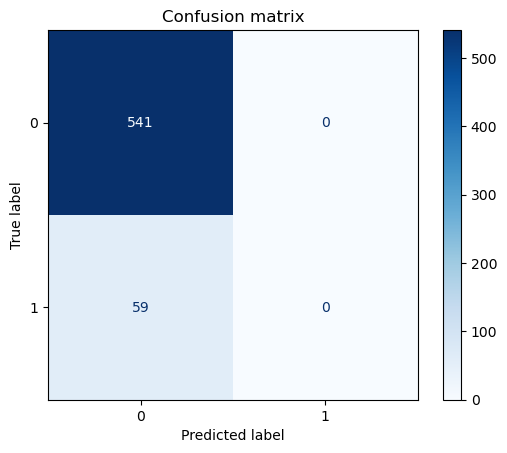

In [12]:
# build perceptron
clf = MLPClassifier(solver='sgd', # gradient descent = sgd
                    alpha=alphas[bestPerformingAlpha],
                    hidden_layer_sizes= hiddenLayerConfigs[bestPerformingLayerConfig], 
                    random_state=9,
                    max_iter=1000)
clf.fit(X_train, trainCrit)

# get accuracy score
print(f"train data accuracy: {clf.score(X_train, trainCrit).round(2)}")
print(f"test data accuracy: {clf.score(X_test, testCrit).round(2)}")


y_pred_test = clf.predict(X_test)
bestAccuracyNeuralNetworks = clf.score(X_test, testCrit)
precisionNeuralNetworks = precision_score(testCrit, y_pred_test, average='binary')
recallNeuralNetworks = recall_score(testCrit, y_pred_test, average='binary')
F1NeuralNetworks = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()

# K-Nearest Neighbours

In [26]:
scaler = StandardScaler()  
scaler.fit(trainDataWithoutCrit)  
trainDataWithoutCrit = scaler.transform(trainDataWithoutCrit)  
testDataWithoutCrit = scaler.transform(testDataWithoutCrit)

In [27]:
# get correct data types 
trainDataWithoutCrit = np.array(trainDataWithoutCrit)
testDataWithoutCrit = np.array(testDataWithoutCrit)
trainCrit = np.array(trainCrit)
testCrit = np.array(testCrit)

# classify
knnClassifier = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


train data accuracy: 1.0
test data accuracy: 0.85


### What k would make the best predictions?


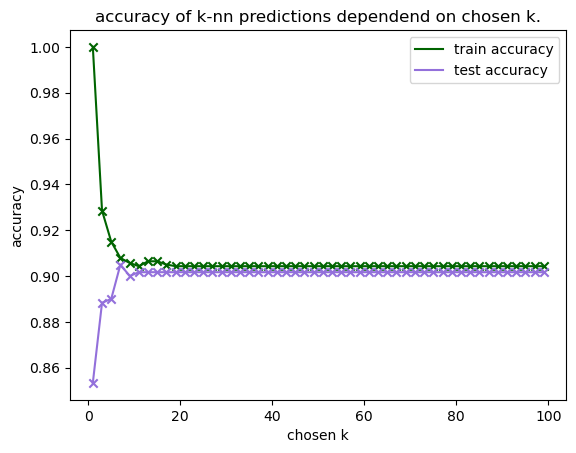

7


In [28]:
allTrainAccuracies = []
allTestAccuracies = []
listChosenK = list(range(1, 100, 2))


for i in listChosenK:
    # classify
    knnClassifier = KNeighborsClassifier(n_neighbors=i, metric = "euclidean")
    knnClassifier.fit(trainDataWithoutCrit, trainCrit)
    predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
    predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)
    # get accuracies 
    allTrainAccuracies.append(accuracy_score(predictionsKnnTrain, trainCrit))
    allTestAccuracies.append(accuracy_score(predictionsKnnTest, testCrit))

# visualise
plt.plot(listChosenK, allTrainAccuracies, c = "darkgreen", label = "train accuracy")
plt.scatter(listChosenK, allTrainAccuracies, c = "darkgreen", marker='x')
plt.plot(listChosenK, allTestAccuracies, c = "mediumpurple", label = "test accuracy")
plt.scatter(listChosenK, allTestAccuracies, c = "mediumpurple", marker='x')

plt.title("accuracy of k-nn predictions dependend on chosen k.")
plt.xlabel("chosen k")
plt.ylabel("accuracy")
plt.legend()
#plt.savefig('knn-accuracy-k.svg', format='svg')

plt.show()

bestPerformingKPosition = allTestAccuracies.index(max(allTestAccuracies)) 
bestPerformingK = listChosenK[bestPerformingKPosition]
print(bestPerformingK)

train data accuracy: 0.91
test data accuracy: 0.9


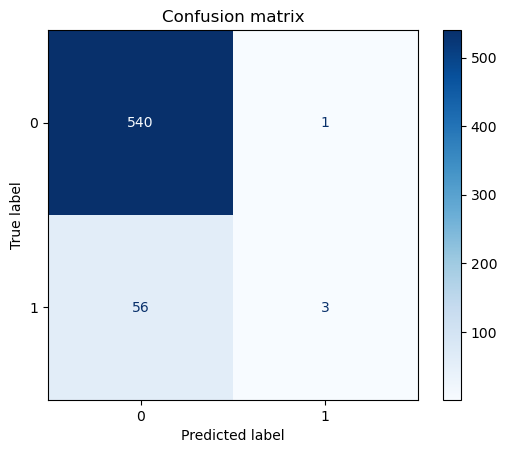

In [31]:
# classify
knnClassifier = KNeighborsClassifier(n_neighbors=bestPerformingK, metric = "euclidean")
knnClassifier.fit(trainDataWithoutCrit, trainCrit)
predictionsKnnTrain = knnClassifier.predict(trainDataWithoutCrit)
predictionsKnnTest = knnClassifier.predict(testDataWithoutCrit)

# get accuracy scores
print(f"train data accuracy: {accuracy_score(predictionsKnnTrain, trainCrit).round(2)}")
print(f"test data accuracy: {accuracy_score(predictionsKnnTest, testCrit).round(2)}")


y_pred_test = knnClassifier.predict(testDataWithoutCrit)
bestAccuracyKnn = knnClassifier.score(testDataWithoutCrit, testCrit)
precisionKnn = precision_score(testCrit, y_pred_test, average='binary')
recallKnn = recall_score(testCrit, y_pred_test, average='binary')
F1Knn = f1_score(testCrit, y_pred_test, average='binary')

cm = confusion_matrix(testCrit, y_pred_test)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can change colormap as desired
plt.title(f"Confusion matrix")
plt.show()



# Overall Performances of different supervised learning algorithms

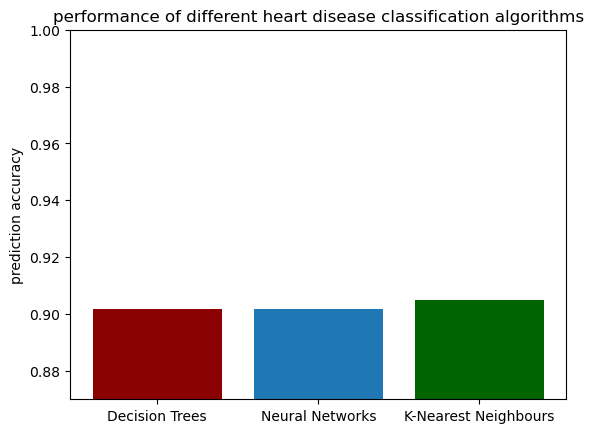

In [17]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allAccuracies = [bestAccuracyTrees, bestAccuracyNeuralNetworks, bestAccuracyKnn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.bar(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([0.87, 1])
ax.set_ylabel("prediction accuracy")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-accuracy.svg', format='svg')
plt.show()

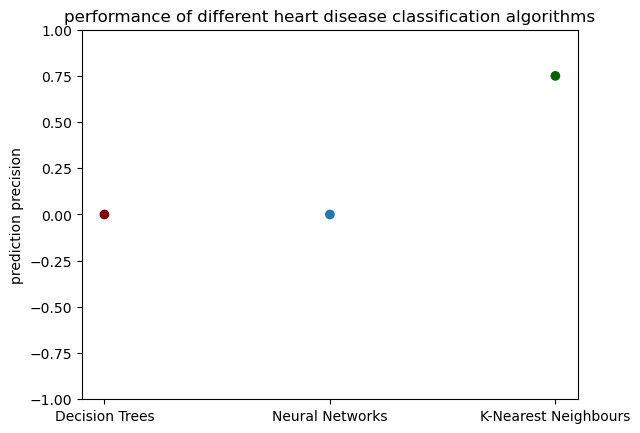

In [18]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allAccuracies = [precisionTrees, precisionNeuralNetworks, precisionKnn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 1])
ax.set_ylabel("prediction precision")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-precision.svg', format='svg')

plt.show()

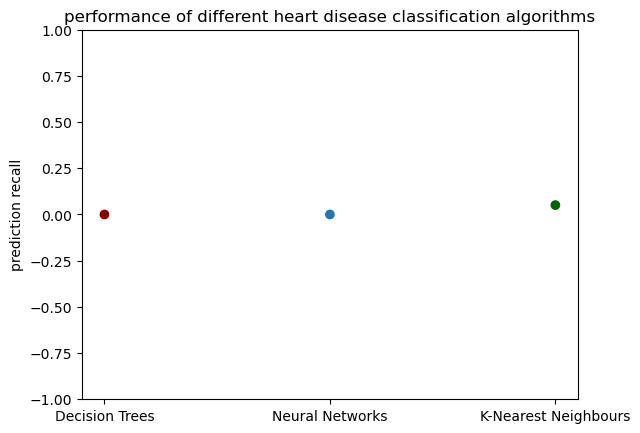

In [19]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allAccuracies = [recallTrees, recallNeuralNetworks, recallKnn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 1])
ax.set_ylabel("prediction recall")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-recall.svg', format='svg')

plt.show()

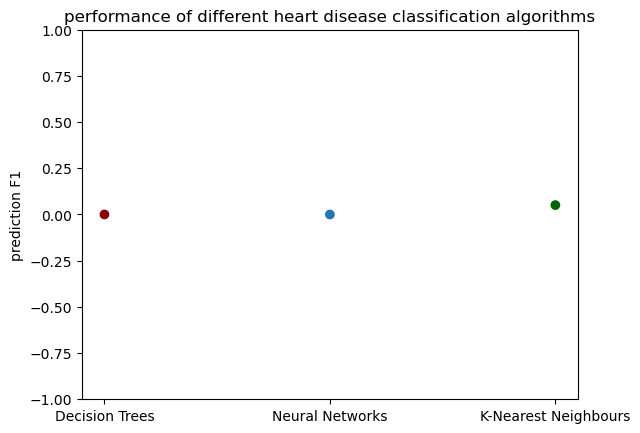

In [20]:
# visualise
classifierNames = ("Decision Trees", "Neural Networks", "K-Nearest Neighbours")
allF1 = [F1Trees, F1NeuralNetworks, F1Knn]
barColors = ['darkred', 'tab:blue','darkgreen']
fig, ax = plt.subplots()
ax.scatter(classifierNames, allAccuracies, color = barColors)
ax.set_ylim([-1, 1])
ax.set_ylabel("prediction F1")
ax.set_title("performance of different heart disease classification algorithms")
#plt.savefig('supervised-comparing-f1.svg', format='svg')

plt.show()